# Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

## Import Data

In [2]:
data = pd.read_excel("2023-cleaned-survey.xlsx")
data.head()

data.shape

(350, 271)

This data comes from a survey targeting various roles within the creative industry. It was conducted to help a non-profit organization better serve the community. Each row represents an individual in a creative role based in Nashville, while each column corresponds to a survey question.

## Fill Missing Values / Remove Missing Columns

1. Fill data with Na if empty
2. Create a list of column names with almost all missing values
3. Remove columns with missing values

In [3]:
data_filled = data.fillna(np.nan)

def columns_with_many_nans(df, threshold):
    """
    Returns a list of column names in the DataFrame that have more than the specified threshold of NaN values.
    """
    nan_count = df.isnull().sum()
    columns_with_excess_nans = nan_count[nan_count > threshold].index.tolist()
    return columns_with_excess_nans

threshold_start=345

columns_with_excess_nan_values = columns_with_many_nans(data_filled, threshold_start)
columns_with_excess_nan_values

['Role Description as an Arts Educator',
 'Creative Disciplines You Teach',
 'Years of Experience as Arts Educator',
 'Rate Barriers to Success for Artists/Educators Access to affordable creative practice/development space',
 'Rate Barriers to Success for Artists/Educators Access to affordable performance/presentation space',
 'Rate Barriers to Success for Artists/Educators Access to funding',
 'Rate Barriers to Success for Artists/Educators Lack of business management knowledge',
 'Rate Barriers to Success for Artists/Educators No formal undergraduate, graduate, or informal technical skills training in your field',
 'Rate Barriers to Success for Artists/Educators Not enough of an audience for your work',
 'Rate Barriers to Success for Artists/Educators Perceived lack of support from the government (municipal, state)',
 'Rate Barriers to Success for Artists/Educators Perceived lack of support from the private sector/business community',
 'Rate Barriers to Success for Artists/Educators 

In [4]:
# Deleting the columns with excess NaN values
df_cleaned_empty = data_filled.drop(columns_with_excess_nan_values, axis=1)
df_cleaned_empty.shape  # Displaying the first few rows of the cleaned DataFrame

(350, 248)

## Seperate by Role

1. Create a new column called "Primary Role" from "Describe Your Primary Role in Creative Sector"
2. Establish new DataFrames for each role

In [5]:
jobs_df = df_cleaned_empty['Describe Your Primary Role in Creative Sector'].str.split("(").str[0]

df_cleaned_empty['Primary Role'] = jobs_df 


unique_strings = df_cleaned_empty['Primary Role'].unique()
unique_strings

/var/folders/l5/vvgcqs212k1cb47098m4sbm80000gn/T/ipykernel_11165/3383167546.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned_empty['Primary Role'] = jobs_df


array(['Creative Worker ', 'Arts Administrator ', 'Arts Funder ',
       'Business Professional ', 'Civic and/or Social Service Worker ',
       'Creative Entrepreneurs ', 'Arts Educator or Teaching Artist '],
      dtype=object)

In [6]:
dataframes_dict = {}
unique_roles = df_cleaned_empty['Primary Role'].unique()

for role in unique_roles:
    dataframes_dict[role.strip()] = df_cleaned_empty[df_cleaned_empty['Primary Role'] == role]

# For demonstration, showing the first few rows of the dataframe for 'Creative Worker'
CreativeWorker = dataframes_dict['Creative Worker']
CreativeWorker = pd.DataFrame(CreativeWorker)
print('CreativeWorker:',CreativeWorker.shape)

ArtsAdministrator = dataframes_dict['Arts Administrator']
ArtsAdministrator = pd.DataFrame(ArtsAdministrator)
print('ArtsAdministrator:',ArtsAdministrator.shape)

ArtsFunder = dataframes_dict['Arts Funder']
ArtsFunder = pd.DataFrame(ArtsFunder)
print('ArtsFunder:',ArtsFunder.shape)

BusinessProfessional = dataframes_dict['Business Professional']
BusinessProfessional = pd.DataFrame(BusinessProfessional)
print('BusinessProfessional:',BusinessProfessional.shape)

CivicSocialServiceWorker = dataframes_dict['Civic and/or Social Service Worker']
CivicSocialServiceWorker = pd.DataFrame(CivicSocialServiceWorker)
print('CivicSocialServiceWorker:',CivicSocialServiceWorker.shape)

CreativeEntrepreneurs = dataframes_dict['Creative Entrepreneurs']
CreativeEntrepreneurs = pd.DataFrame(CreativeEntrepreneurs)
print('CreativeEntrepreneurs:',CreativeEntrepreneurs.shape)

ArtsEducator = dataframes_dict['Arts Educator or Teaching Artist']
ArtsEducator = pd.DataFrame(ArtsEducator)
print('ArtsEducator:',ArtsEducator.shape)


CreativeWorker: (50, 249)
ArtsAdministrator: (50, 249)
ArtsFunder: (50, 249)
BusinessProfessional: (50, 249)
CivicSocialServiceWorker: (50, 249)
CreativeEntrepreneurs: (50, 249)
ArtsEducator: (50, 249)


## Remove Missing Columns From New DataFrames

Remove columns with a lot of missing values from the role DataFrame

In [7]:
threshold = 49

#CreativeWorker cleaned empty columns
empty_columns_CreativeWorker = columns_with_many_nans(CreativeWorker, threshold)

CreativeWorker_cleaned_empty = CreativeWorker.drop(empty_columns_CreativeWorker, axis=1).reset_index()
print("Creative Worker Dimension:",CreativeWorker_cleaned_empty.shape)

#ArtsAdministrator cleaned empty columns
empty_columns_ArtsAdministrator = columns_with_many_nans(ArtsAdministrator, threshold)

ArtsAdministrator_cleaned_empty = ArtsAdministrator.drop(empty_columns_ArtsAdministrator, axis=1).reset_index()
print("Arts Administrator Dimension:",ArtsAdministrator_cleaned_empty.shape)

#ArtsFunder cleaned empty columns
empty_columns_ArtsFunder = columns_with_many_nans(ArtsFunder, threshold)

ArtsFunder_cleaned_empty = ArtsFunder.drop(empty_columns_ArtsFunder, axis=1).reset_index()
print("Arts Funder Dimension:",ArtsFunder_cleaned_empty.shape)


#BusinessProfessional cleaned empty columns
empty_columns_BusinessProfessional = columns_with_many_nans(BusinessProfessional, threshold)

BusinessProfessional_cleaned_empty = BusinessProfessional.drop(empty_columns_BusinessProfessional, axis=1).reset_index()
print("Business Professional Dimension:",BusinessProfessional_cleaned_empty.shape)

#CivicSocialServiceWorker cleaned empty columns
empty_columns_CivicSocialServiceWorker = columns_with_many_nans(CivicSocialServiceWorker, threshold)

CivicSocialServiceWorker_cleaned_empty = CivicSocialServiceWorker.drop(empty_columns_CivicSocialServiceWorker, axis=1).reset_index()
print("CivicSocial Service Worker Dimension:",CivicSocialServiceWorker_cleaned_empty.shape)

#CreativeEntrepreneurs cleaned empty columns
empty_columns_CreativeEntrepreneurs = columns_with_many_nans(CreativeEntrepreneurs, threshold)

CreativeEntrepreneurs_cleaned_empty = CreativeEntrepreneurs.drop(empty_columns_CreativeEntrepreneurs, axis=1).reset_index()
print("Creative Entrepreneurs Dimension:",CreativeEntrepreneurs_cleaned_empty.shape)


#ArtsEducator cleaned empty columns
empty_columns_ArtsEducator = columns_with_many_nans(ArtsEducator, threshold)

ArtsEducator_cleaned_empty = ArtsEducator.drop(empty_columns_ArtsEducator, axis=1).reset_index()
print("Arts Educator Dimension:",ArtsEducator_cleaned_empty.shape)


Creative Worker Dimension: (50, 131)
Arts Administrator Dimension: (50, 131)
Arts Funder Dimension: (50, 34)
Business Professional Dimension: (50, 49)
CivicSocial Service Worker Dimension: (50, 30)
Creative Entrepreneurs Dimension: (50, 145)
Arts Educator Dimension: (50, 119)


## 4. Future Directions

### Question 1: Of all of the respondents who answered the question, what proportion of respondents are currently members of the non-profit organization? Does this differ by role?

##### Of all the respondents who answered the question, 34% are current members of the non-profit organization. Notably, among the primary roles surveyed, Arts Administrators and Creative Workers were the only roles to answer this question. 30% of Arts Administrators said they were current members, while 38% of Creative Workers claimed to be current members of the non-profit organization.

In [8]:
value_counts = df_cleaned_empty['Is Your Organization a Member of The Non-Profit?'].str.lower().value_counts()
print(value_counts)

respondents = value_counts.get("yes", 0) + value_counts.get("no", 0) + value_counts.get("unsure", 0)
respondents

print("Proportion:",value_counts.get("yes", 0) / respondents)


unsure    34
yes       34
no        32
Name: Is Your Organization a Member of The Non-Profit?, dtype: int64
Proportion: 0.34


In [9]:
df_cleaned_empty.groupby(['Primary Role','Is Your Organization a Member of The Non-Profit?']).agg({'Is Your Organization a Member of The Non-Profit?':'count'})



Is Your Organization a Member of The Non-Profit?
Primary Role        Is Your Organization a Member of The Non-Profit?                                                  
Arts Administrator  No                                                                                              14
                    Unsure                                                                                          21
                    Yes                                                                                             15
Creative Worker     No                                                                                              18
                    Unsure                                                                                          13
                    Yes                                                                                             19

In [10]:
ArtsAdministrator_value_counts = ArtsAdministrator_cleaned_empty['Is Your Organization a Member of The Non-Profit?'].str.lower().value_counts()
print("Proportion of Arts Administrator:",ArtsAdministrator_value_counts.get("yes", 0) / len(ArtsAdministrator_cleaned_empty))



CreativeWorker_value_counts = CreativeWorker_cleaned_empty['Is Your Organization a Member of The Non-Profit?'].str.lower().value_counts()
print("Proportion of Creative Worker:",CreativeWorker_value_counts.get("yes", 0) / len(CreativeWorker_cleaned_empty))


Proportion of Arts Administrator: 0.3
Proportion of Creative Worker: 0.38


### Question 2: Based on Creative Workers and Arts Administrators, what would be beneficial for the non-profit organization to invest its time and energy into? Justify your answers.

#### Overall: Based on the survey data from both Creative Workers and Arts Administrators, we recommend that the non-profit organization invest its resources in understanding the perceived lack of support from the private sector/business community. Our findings indicate that 68% of Creative Workers and Arts Administrators view this lack of support as a barrier to their organization's success, attributing at least some impact to it. And 43% of all Creative Workers and Arts Administrators say this barrier poses a significant or high impact on success.



In [11]:
x = "Rate Barriers to Success in Your Organization Perceived lack of support from the private sector/business community"

combined_df = pd.concat([CreativeWorker_cleaned_empty, ArtsAdministrator_cleaned_empty], ignore_index=True)
impact =combined_df.groupby(["Primary Role",x]).agg({x:"count"})





In [12]:
impact =combined_df.groupby([x]).agg({x:"count"})
impact

,Rate Barriers to Success in Your Organization Perceived lack of support from the private sector/business community
Rate Barriers to Success in Your Organization Perceived lack of support from the private sector/business community,
1 - No impact,18
2 - Little impact,14
3 - Some impact,25
4 - Significant impact,25
5 - Highly impactful,18


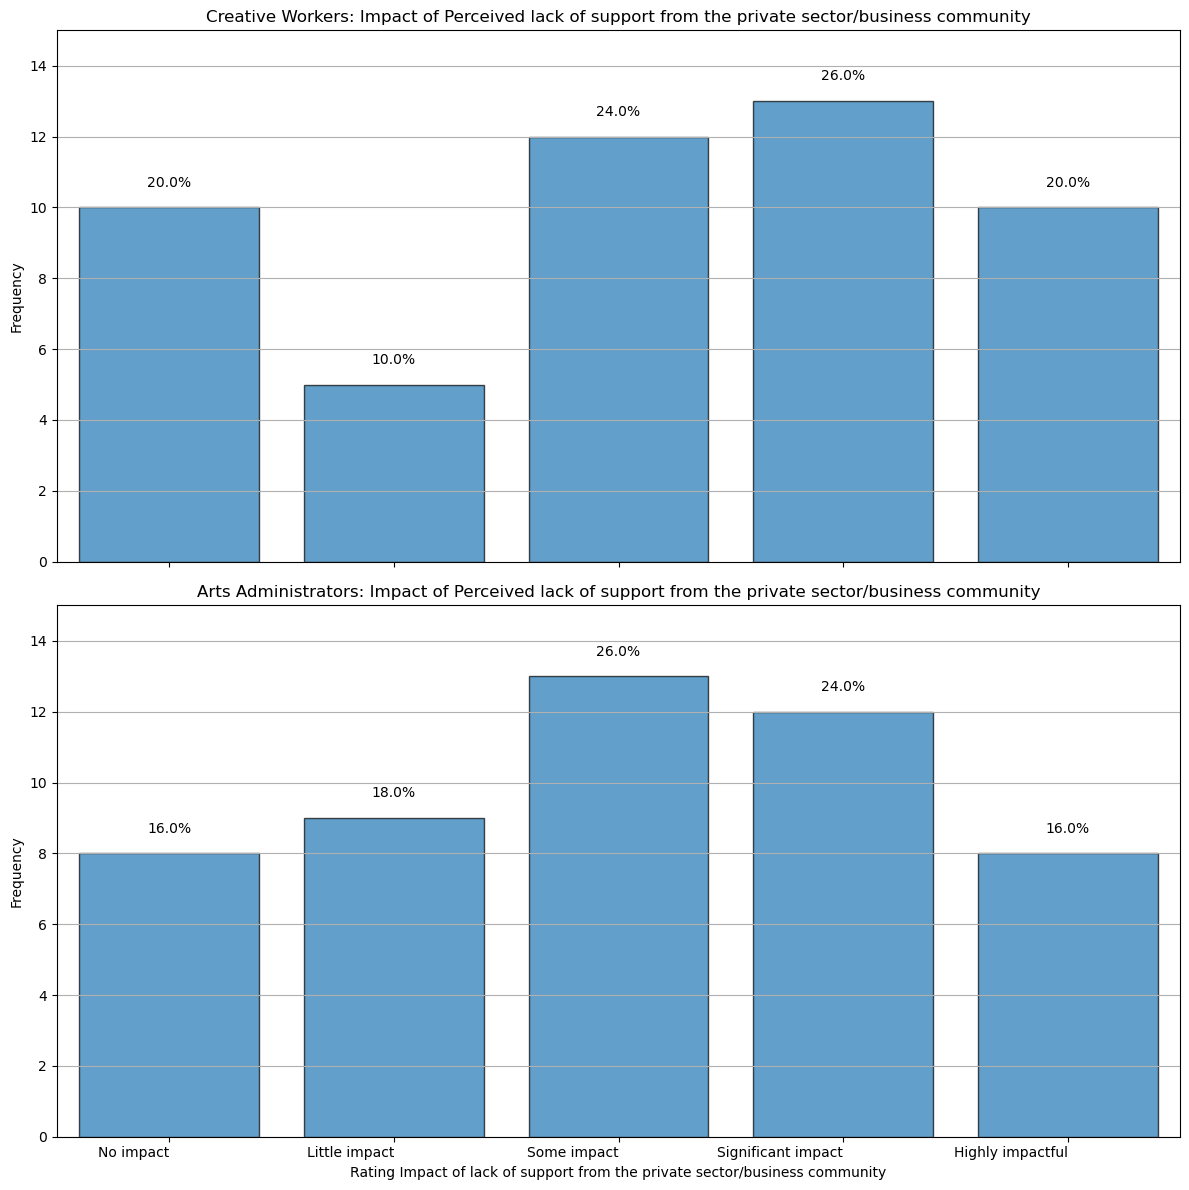

In [13]:
primary_roles = combined_df["Primary Role"].dropna().unique()

# Rating labels
rating_labels = [
    "No impact",
    "Little impact",
    "Some impact",
    "Significant impact",
    "Highly impactful"
]




# Adjusting the code to increase the height of each subplot for better legibility

fig, axes = plt.subplots(len(primary_roles), 1, figsize=(12, 6 * len(primary_roles)), sharex=True)

for i, role in enumerate(primary_roles):
    # Filtering the data based on primary role
    filtered_data = combined_df[combined_df["Primary Role"] == role]
    data_hist_role = filtered_data["Rate Barriers to Success in Your Organization Perceived lack of support from the private sector/business community"].dropna()
    
    # Extracting the first number for the filtered data
    data_hist_str_role = data_hist_role.astype(str)
    data_hist_str_role = data_hist_str_role.str.extract('(\d)')[0]
    data_hist_ordered_role = data_hist_str_role.dropna().astype(int)
    
    # Calculating the frequencies
    frequencies = data_hist_ordered_role.value_counts().sort_index()
    
    # Plotting the bar chart on the respective subplot
    bars = axes[i].bar(frequencies.index, frequencies.values, edgecolor="k", alpha=0.7)
    
    # Annotate the bars with percentages
    total = frequencies.sum()
    for bar in bars:
        height = bar.get_height()
        percentage = f"{100 * height / total:.1f}%"
        axes[i].text(bar.get_x() + bar.get_width()/2, height + 0.5, percentage, ha='center', va='bottom')
    
    # Setting title, ylabel, grid, and xticks for the subplot
    axes[i].set_title(f"Arts Administrators: Impact of Perceived lack of support from the private sector/business community")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', which='both')
    axes[i].set_xticks(range(1, 6))
    axes[i].set_xticklabels(rating_labels, ha="right")
    axes[i].set_xlim(0.5, 5.5)
    axes[i].set_ylim(0, 15)

# Removing xlabel for all subplots except the last one
for ax in axes[:-1]:
    ax.set_xlabel("")
    ax.set_title("Creative Workers: Impact of Perceived lack of support from the private sector/business community")
    
axes[-1].set_xlabel("Rating Impact of lack of support from the private sector/business community")
plt.tight_layout()
plt.show()





### Question 3: Based on Business Professionals and Social Workers, what would be beneficial for the non-profit organization to invest its time and energy into? Are there certain topics or outcomes that seem more interesting than others and more worth the expense? Justify your answers.


#### In this section, we examined the perceived value of art in the community in relation to the membership or involvement of Business Professionals and Social Workers. This topic is particularly impactful, as we discovered in the previous section that the majority of Creative Workers and Arts Administrators perceive a lack of support from the private sector/business community as at least somewhat of a barrier to their success.

#### We examined the survey questions that addressed whether the respondent perceived value in the arts for communities and if the respondent works or volunteers in an arts organization. From this analysis, we aimed to determine the proportion of respondents who both believed in the value of arts in the community and worked or volunteered with an arts organization. Grouping the data in this manner also enabled us to answer the following questions: 1.Are there respondents who believe in the value of arts in the community but do not work or volunteer in an arts organization?, 2. Are there respondents who do not believe in the value of arts in the community but do work or volunteer in an arts organization?, 3.Is there a significant proportion of respondents who do not see the value of arts in the community and also do not work or volunteer in an arts organization?

#### For Business Professionals:
#### We were able to gather that a majority of Business Professionals did not see the value of arts in the community. Of the Business Professionals that did see the value of arts in the community, only half of Work/Volunteer in Arts Organization. Of the Business Professionals that did not Perceived Value of Arts to Communities, a majority do Work/Volunteer in Arts Organization. We also found that there is a slightly higher number of respodence that dont see the value of arts in the community and not Work/Volunteer in Arts Organization, when compaired to respodence that do see the value of arts in the community and Work/Volunteer in Arts Organization.

#### For Social Workers:
#### We were able to gather that a majority of Social Workers do see the value of arts in the community. Of the Social Workers that did see the value of arts in the community, the majority do Work/Volunteer in Arts Organization. Of the Social Workers that did not Perceived Value of Arts to Communities, a majority do Work/Volunteer in Arts Organization.

#### For Business Professionals and Social Workers:
#### We observe that 54% of respondents recognize the value of arts in the community. However, only 30% of these respondents both acknowledge the value of arts and are actively involved in an arts organization. Interestingly, there's a notable segment of the respondents (26%) who are involved in an arts organization but do not perceive arts as adding value to the community.

#### Based on our analysis, we put forth the following recommendations:
#### 1. Promote Awareness: The organization should focus on educating both Business Professionals and Social Workers about the intrinsic and extrinsic values of arts within the community. This could involve workshops, seminars, or collaborative events that highlight the impact and importance of arts.
#### 2. Barrier Identification: For those Business Professionals and Social Workers who do recognize the value of arts but are not currently engaged with any arts organization, it is essential to identify and address potential barriers to their involvement. This could be achieved through surveys, focus groups, or direct consultations, aiming to understand and subsequently mitigate the challenges they face.



##### Business Professionals

In [14]:
x = "Perceived Value of Arts to Communities"

BusinessProfessional_cleaned_empty["Work/Volunteer in Arts Organization"] = BusinessProfessional_cleaned_empty["Work/Volunteer in Arts Organization"].str.split().str[0].str.replace(",", "")


impact =BusinessProfessional_cleaned_empty.groupby([x,"Work/Volunteer in Arts Organization"]).agg({'Work/Volunteer in Arts Organization':'count'})

impact



Work/Volunteer in Arts Organization
Perceived Value of Arts to Communities Work/Volunteer in Arts Organization                                     
No                                     No                                                                    12
                                       Yes                                                                   16
Yes                                    No                                                                    11
                                       Yes                                                                   11

In [15]:
impact =BusinessProfessional_cleaned_empty.groupby([x]).agg({x:"count"})

impact

,Perceived Value of Arts to Communities
Perceived Value of Arts to Communities,
No,28
Yes,22


<Figure size 1000x600 with 0 Axes>

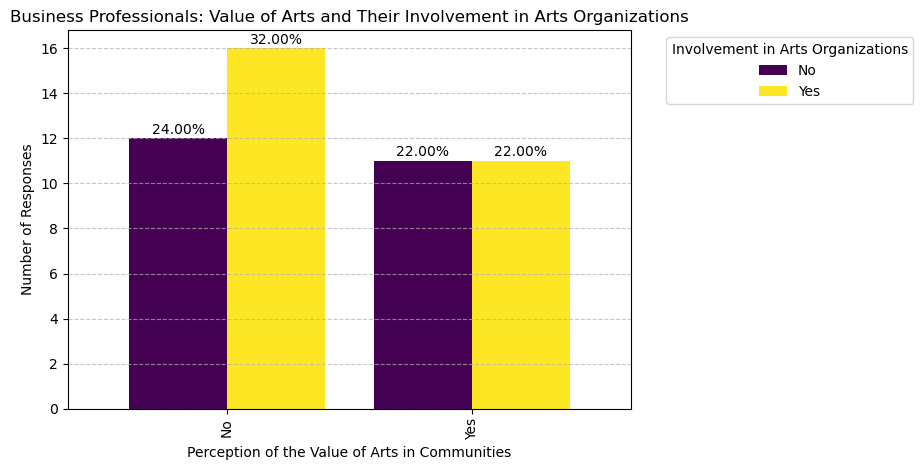

In [16]:
# Calculating the percentages for the bars

# Getting the total number of responses in the BusinessProfessional_cleaned_empty dataset
total_responses_business = len(BusinessProfessional_cleaned_empty)

# Function to display the percentage on the bars
def display_percentage_business(p, total_responses):
    for patch in p.patches:
        count = patch.get_height()
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() + 0.2
        percentage = count / total_responses * 100
        plt.annotate(f"{percentage:.2f}%", (x, y), ha="center")

# Creating the cross-tabulation for visualization
membership_by_value = pd.crosstab(BusinessProfessional_cleaned_empty["Perceived Value of Arts to Communities"], 
                                  BusinessProfessional_cleaned_empty["Work/Volunteer in Arts Organization"])

# Visualization of the cross-tabulation as a grouped bar graph
plt.figure(figsize=(10, 6))
ax = membership_by_value.plot(kind='bar', colormap='viridis', width=0.8)
ax.set_title("Business Professionals: Value of Arts and Their Involvement in Arts Organizations")
ax.set_ylabel("Number of Responses")
ax.set_xlabel("Perception of the Value of Arts in Communities")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title="Involvement in Arts Organizations", bbox_to_anchor=(1.05, 1), loc='upper left')

# Displaying the percentages on the bars
display_percentage_business(ax, total_responses_business)

plt.show()


Caption: Grouped bar graph illustrating the relationship between Business Professionals' perceived value of arts in the community and their involvement in arts organizations. Notably, the graph highlights differences in the number of professionals who work or volunteer in arts organizations based on their perception of arts' value.

Insights:

1. The majority of Business Professionals do not perceive a value in arts within the community.
2. Most Business Professionals involved in an arts organization do not perceive a value in arts within the community.
3. Among Business Professionals who believe in the value of arts in the community, an equal number are involved and not involved in an arts organization.
4. Only 22% of Business Professionals both believe in the value of arts in the community and are involved in an arts organization.
5. 24% of Business Professionals neither see the value in arts in the community nor are involved in an arts organization.



##### Social Workers


In [17]:
# Extracting the first word from the string and replacing the column values
CivicSocialServiceWorker_cleaned_empty["Do you work or volunteer with any art organization?.1"] = CivicSocialServiceWorker_cleaned_empty["Do you work or volunteer with any art organization?.1"].str.split().str[0].str.replace(",", "")
x = "Regardless of your involvement in the arts, do you think they add value to our communities?.1"

y = "Do you work or volunteer with any art organization?.1"

impact =CivicSocialServiceWorker_cleaned_empty.groupby([x,y]).agg({y:"count"})

impact

Do you work or volunteer with any art organization?.1
Regardless of your involvement in the arts, do ... Do you work or volunteer with any art organizat...                                                       
No                                                 No                                                                                                  8    
                                                   Yes                                                                                                10    
Yes                                                No                                                                                                 13    
                                                   Yes                                                                                                19

In [18]:
impact =CivicSocialServiceWorker_cleaned_empty.groupby([x]).agg({x:"count"})

impact

,"Regardless of your involvement in the arts, do you think they add value to our communities?.1"
"Regardless of your involvement in the arts, do you think they add value to our communities?.1",
No,18
Yes,32


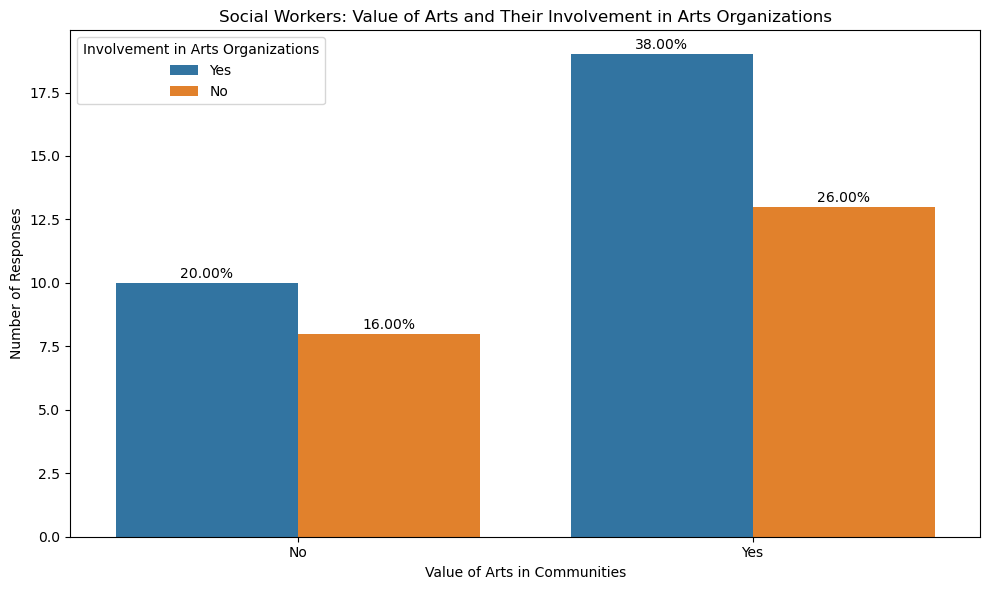

In [19]:
# Calculating the percentages for the bars

# Getting the total number of responses
total_responses = len(CivicSocialServiceWorker_cleaned_empty)

# Function to display the percentage on the bars
def display_percentage(p, total_responses):
    for patch in p.patches:
        count = patch.get_height()
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() + 0.2
        if count > 0:
            percentage = count / total_responses * 100
            plt.annotate(f"{percentage:.2f}%", (x, y), ha="center")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=CivicSocialServiceWorker_cleaned_empty,
                   x="Regardless of your involvement in the arts, do you think they add value to our communities?.1",
                   hue="Do you work or volunteer with any art organization?.1")

plt.title("Social Workers: Value of Arts and Their Involvement in Arts Organizations")
plt.xlabel("Value of Arts in Communities")
plt.ylabel("Number of Responses")
plt.legend(title="Involvement in Arts Organizations")

# Displaying the percentages on the bars
display_percentage(ax, total_responses)

plt.tight_layout()
plt.show()


Caption:
Grouped bar graph showcasing Social Workers' opinions on the significance of arts in the community juxtaposed with their engagement in arts organizations. The visualization emphasizes the correlation (or lack thereof) between appreciation for the arts and active participation in the arts sector.

Insights:

1. The majority of Social Workers do perceive a value in arts within the community.
2. Most Social Workers involved in an arts organization do perceive a value in arts within the community.
3. Among Social Workers who believe in the value of arts in the community, a majority are involved in an arts organization.
4. 38% of Social Workers both believe in the value of arts in the community and are involved in an arts organization.
5. 16% of Social Workers neither see the value in arts in the community nor are involved in an arts organization.

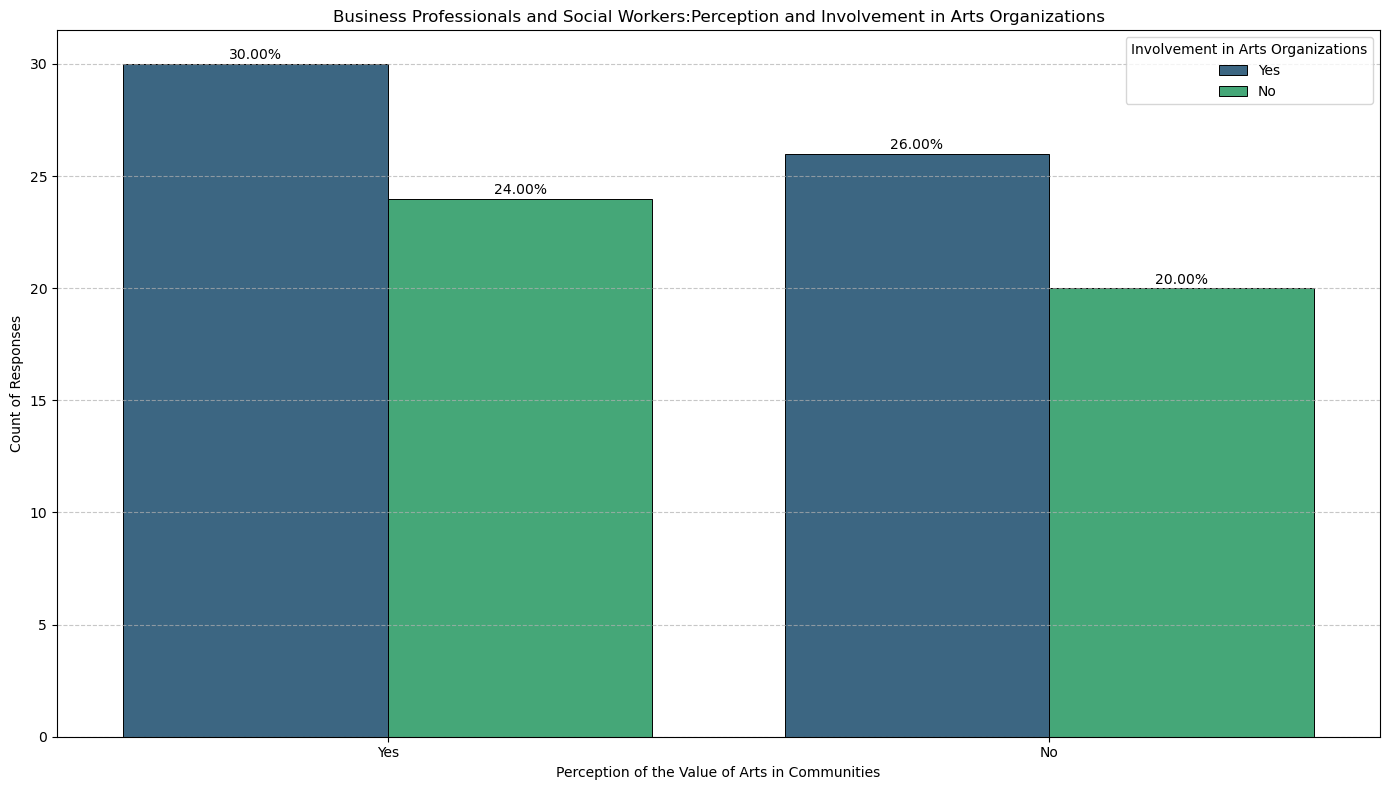

In [20]:
# 1. Adding a new column to specify the group
CivicSocialServiceWorker_cleaned_empty['Group'] = 'Social Worker'
BusinessProfessional_cleaned_empty['Group'] = 'Business Professional'

# 2. Concatenating both dataframes
# Before concatenating, we need to ensure that the column names are consistent between the two dataframes.
# Renaming columns in BusinessProfessional_cleaned_empty to match those in CivicSocialServiceWorker_cleaned_empty
combined_df = pd.concat([
    CivicSocialServiceWorker_cleaned_empty[["Regardless of your involvement in the arts, do you think they add value to our communities?.1", "Do you work or volunteer with any art organization?.1", "Group"]],
    BusinessProfessional_cleaned_empty.rename(columns={"Perceived Value of Arts to Communities": "Regardless of your involvement in the arts, do you think they add value to our communities?.1",
                                                       "Work/Volunteer in Arts Organization": "Do you work or volunteer with any art organization?.1"})[["Regardless of your involvement in the arts, do you think they add value to our communities?.1", "Do you work or volunteer with any art organization?.1", "Group"]]
], ignore_index=True)

# 3. Creating the grouped bar graph
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=combined_df, 
                   x="Regardless of your involvement in the arts, do you think they add value to our communities?.1", 
                   hue="Do you work or volunteer with any art organization?.1", 
                   palette="viridis",
                   dodge=True,
                   edgecolor="black",
                   linewidth=0.7,
                   order=["Yes", "No"],
                   hue_order=["Yes", "No"])

# Displaying the percentages on the bars
display_percentage(ax, len(combined_df))

plt.title("Business Professionals and Social Workers:Perception and Involvement in Arts Organizations")
plt.xlabel("Perception of the Value of Arts in Communities")
plt.ylabel("Count of Responses")
plt.legend(title="Involvement in Arts Organizations", loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Caption: The graph showcases the perceptions of Social Workers and Business Professionals regarding the value of arts in communities, alongside their involvement in arts organizations. The bars represent the percentage of total responses. For both groups, the majority perceive arts as valuable to communities, with varying degrees of involvement in arts organizations.

### Question 4: What is the distribution of respondents that are planning on leaving Nashville in the next year? Does this differ by role?

###### Out of the 170 participants who answered the question "Do you plan to remain in The Area for more than the next 2-3 years?" 43, or approximately 25%, definitively stated that they will not be remaining in Nashville for the next 2-3 years. Except for Civic and/or Social Service Workers, all primary roles were posed this question. Business Professionals had the lowest percentage of respondents planning to leave, with 11% indicating they were departing. Both Creative Entrepreneurs and Arts Educators or Teaching Artists had the highest percentage of respondents leaving the area, at approximately 31%.



In [21]:
empty_counts_per_row = df_cleaned_empty['Do you plan to remain in The Area for more than the next 2-3 years?'].isna().sum()

empty_counts_per_row



180

In [22]:
df_cleaned_empty['Do you plan to remain in The Area for more than the next 2-3 years?'].nunique()


137

In [23]:
empty_counts_per_row = df_cleaned_empty['Do you plan to remain in The Area for more than the next 2-3 years?'].isna()

def check_for_yes_no(column):
    def replace_value(x):
        x_lower = str(x).lower()
        if "yes" in x_lower:
            return "Yes"
        elif "no," in x_lower:
            return "No"
        elif "maybe" in x_lower:
            return "Maybe"
        elif "unsure" in x_lower:
            return "Maybe"
        elif "depends" in x_lower:
            return "Maybe"
        elif "neutral" in x_lower:
            return "Maybe"
        elif "might" in x_lower:
            return "Maybe"
        elif "haven't decided" in x_lower:
            return "Maybe"
        elif "Uncertain" in x_lower:
            return "Maybe"
        elif "elsewhere" in x_lower:
            return "No"
        else:
            return x

    return column.apply(replace_value)


df_cleaned_empty['Do you plan to remain in The Area for more than the next 2-3 years?'] = check_for_yes_no(df_cleaned_empty['Do you plan to remain in The Area for more than the next 2-3 years?'])

Planning = df_cleaned_empty['Do you plan to remain in The Area for more than the next 2-3 years?'].value_counts()

print("Definitive No:",Planning.get("No", 0) / len(df_cleaned_empty))


# Group by 'Primary Role' and aggregate the count of "No" responses and the total count for each role
grouped = df_cleaned_empty.groupby('Primary Role').agg(
    no_count=pd.NamedAgg(column='Do you plan to remain in The Area for more than the next 2-3 years?', aggfunc=lambda x: (x == 'No').sum()),
    total_count=pd.NamedAgg(column='Do you plan to remain in The Area for more than the next 2-3 years?', aggfunc='count')
)

# Calculate the proportion of "No" responses for each role
grouped['no_proportion'] = grouped['no_count'] / grouped['total_count']

print(grouped[['no_proportion']])


grouped


c = df_cleaned_empty['Do you plan to remain in The Area for more than the next 2-3 years?'].dropna()

c.value_counts()



Definitive No: 0.12285714285714286
                                     no_proportion
Primary Role                                      
Arts Administrator                        0.259259
Arts Educator or Teaching Artist          0.312500
Arts Funder                               0.240000
Business Professional                     0.148148
Civic and/or Social Service Worker             NaN
Creative Entrepreneurs                    0.312500
Creative Worker                           0.222222


Yes                                                      75
No                                                       43
Maybe                                                    33
Possibly, if the business climate remains supportive.     1
I haven’t decided yet.                                    1
Currently, there are no plans to move.                    1
Not sure, I'll decide when the time comes.                1
It's up in the air right now.                             1
I'm in two minds right now.                               1
It’s still under consideration.                           1
Were in discussions, but currently undecided.             1
Uncertain at the moment.                                  1
No plans as of now, but you never know.                   1
No definite plans, but I'm leaning towards staying.       1
It's a 50-50 situation currently.                         1
No current plans to leave.                                1
Its hard to predict, but as of now, Ill 

In [24]:
All_No = grouped['no_count'].sum() 
All_Answer = grouped['total_count'].sum()

print(All_No,All_Answer)

print("Proportion for all roles:",(All_No/All_Answer))

43 170
Proportion for all roles: 0.2529411764705882


### 4e Based on the final 20 questions of the survey, what is the distribution of respondents who know about the events mentioned in these questions? Does this differ by role?

#### To determine respondents' awareness of the non-profit's events, we utilized the following survey questions: 1. Were you aware that The Non-Profit offers educational events on arts-related legal and business subjects?, 2. Did you know about The Non-Profit's annual creative business development program, Periscope: Artist Entrepreneur Training?, and 3.Have you ever participated in any of The Non-Profit's educational events, including Periscope? From these questions, we compiled a list that allowed us to see the number of respondents who were aware of at least one event.

#### From this, we were able to determine that approximately 90% of respondents knew about a non-profit event. Notably, Civic Social Service Workers were the only primary role that did not answer these questions. Of the roles surveyed, Arts Administrators were the most aware of the non-profit's events, with 96% of the participants knowing of at least one event. In contrast, Creative Workers were the least aware, with only 84% of the participants being aware of at least one event.

In [25]:
#Last 20 questions from the survey
df_cleaned_empty.iloc[:,-21:]



,"If interested in shared back office services, which services would you like to share? (Check all that apply)",What additional features are important to you for an arts-business co-working space?,Are you open to answering more questions about The Non-Profit?,"Are you, or your organization, currently a member of the Arts & Business Council?",Were you aware The Non-Profit offers educational events on arts-related legal and business subjects?,"Did you know about The Non-Profit's annual creative business development program, Periscope: Artist Entrepreneur Training?","Have you ever participated in any of The Non-Profit's educational events, including Periscope?",Are you considering attending any future educational events hosted by The Non-Profit?,"If so, which kinds of educational events are you most likely to attend?",What is your preferred time and day to attend webinars? (Choose all that apply),...,Did you know The Non-Profit offers free legal and professional services to eligible artists and arts organizations in The Area through our VLPA program?,"If so, have you ever used the VLPA's legal or business services?",Are you considering using the VLPA's free legal or business services in the future?,Do you plan to remain in The Area for more than the next 2-3 years?,"If you're undecided or planning to leave, why? (Select all that apply)",Any other comments on your reasons for staying in or departing from The Area's creative ecosystem?,What three words come to mind when you think of the Arts & Business Council of Greater Nashville?,"Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:",Feel free to share any additional insights about The Non-Profit or The Area's Creative Economy not covered in this survey:,Primary Role
0,Accounting,Member Discounts,Yes,Yes,No,No,Yes,Maybe,In-person education events,Weekend Morning,...,Yes,No,Maybe,NaN,My reason is not related to my artistic practice,The Area has given me both challenges and rewa...,"Thrive, Engage, Motivate",Online platform for showcasing local talent.,NaN,Creative Worker
1,Facility Maintenance,Mail and Package Handling Services,No,No,Yes,No,Yes,Maybe,"I'm just as likely to attend in-person, online...",Weekend Afternoon,...,No,Yes,Yes,No,Perceived lack of accessible artistic/creative...,Personal and professional growth are my main r...,NaN,Counseling services for artists.,Ensuring artists receive fair compensation is ...,Arts Administrator
2,NaN,NaN,Yes,No,No,Yes,Yes,Maybe,In-person education events,Weekend Morning,...,No,No,Maybe,NaN,Perceived lack of artistic support from the city,NaN,"Resourceful, Advocate, Partner",NaN,Feedback mechanisms for artists and stakeholde...,Arts Funder
3,NaN,NaN,Yes,Yes,No,Yes,Yes,Yes,In-person education events,Weekend Evening,...,No,Yes,Yes,No,My reason is not related to my artistic practice,NaN,NaN,NaN,NaN,Business Professional
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Civic and/or Social Service Worker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,IT,Mail and Package Handling Services,No,No,Yes,Yes,Yes,Maybe,In-person education events,Weekend Afternoon,...,Yes,Yes,Yes,"Perhaps, I haven’t decided yet.",Perceived lack of artistic support from the ge...,The city's growing cultural scene is captivating.,"Community, Visionary, Trustworthy",Art therapy sessions for the local community.,NaN,Arts Administrator
346,IT,Friendly and inspiring community,No,Unsure,Yes,No,Yes,No,Online education events,Weekend Morning,...,Yes,No,Yes,NaN,Conservative cultural restrictions and gun vio...,I wish there were more platforms for showcasin...,"Foundation, Cultivation, Relationship",Internship opportunities with leading businesses.,NaN,Creative Worker
347,NaN,NaN,Yes,Yes,Yes,Yes,No,Maybe,Hybrid events that include both online and in-...,Weekday Afternoon,...,No,Yes,Maybe,No,Cost of living,NaN,NaN,Webinars on the business side of the

In [26]:
#Last 20 questions from the survey
df_cleaned_empty.iloc[:,-21:]


# Columns to consider
columns_to_check = [
    "Were you aware The Non-Profit offers educational events on arts-related legal and business subjects?",
    "Did you know about The Non-Profit's annual creative business development program, Periscope: Artist Entrepreneur Training?",
    "Have you ever participated in any of The Non-Profit's educational events, including Periscope?"
]

# Creating a new column based on the specified conditions
def new_column_value(row):
    # If any column has 'Yes'
    if 'Yes' in [row[col] for col in columns_to_check]:
        return 'Yes'
    # If all columns have NaN
    elif all(pd.isna(row[col]) for col in columns_to_check):
        return None
    # If the column has 'No' or NaN
    else:
        return 'No'

df_cleaned_empty['New_Column'] = df_cleaned_empty.apply(new_column_value, axis=1)

# Displaying the first few rows of the dataset to verify the new column
df_cleaned_empty[['New_Column'] + columns_to_check].head()

value_counts = df_cleaned_empty['New_Column'].value_counts(dropna=False)

value_counts



Yes     269
None     50
No       31
Name: New_Column, dtype: int64

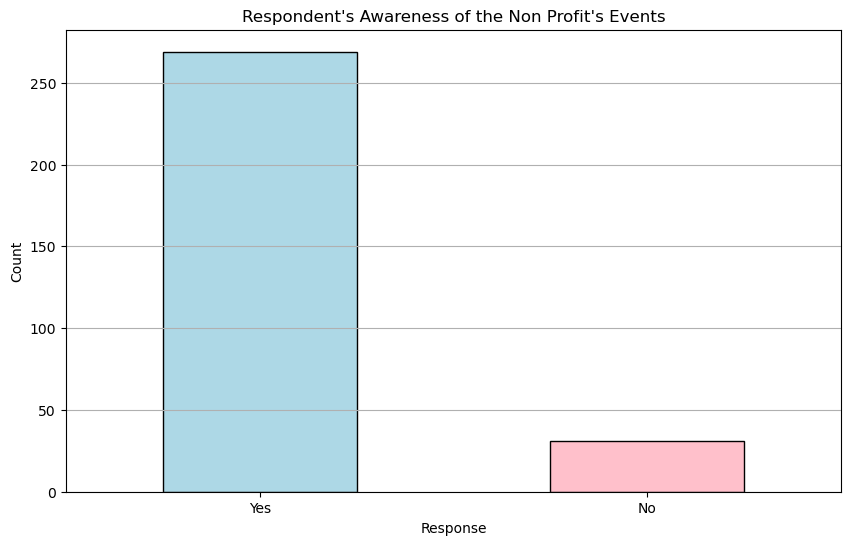

In [27]:
filtered_counts = value_counts[value_counts.index.isin(['Yes', 'No'])]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
filtered_counts.plot(kind='bar', color=['lightblue', 'pink'], edgecolor='black')
plt.title("Respondent's Awareness of the Non Profit's Events")
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


Caption:
The bar graph displays the distribution of respondents who are aware (Yes) and unaware (No) of the Non-Profit's events. The blue bar represents those who are aware, while the pink bar denotes those who are unaware.

<Figure size 1400x800 with 0 Axes>

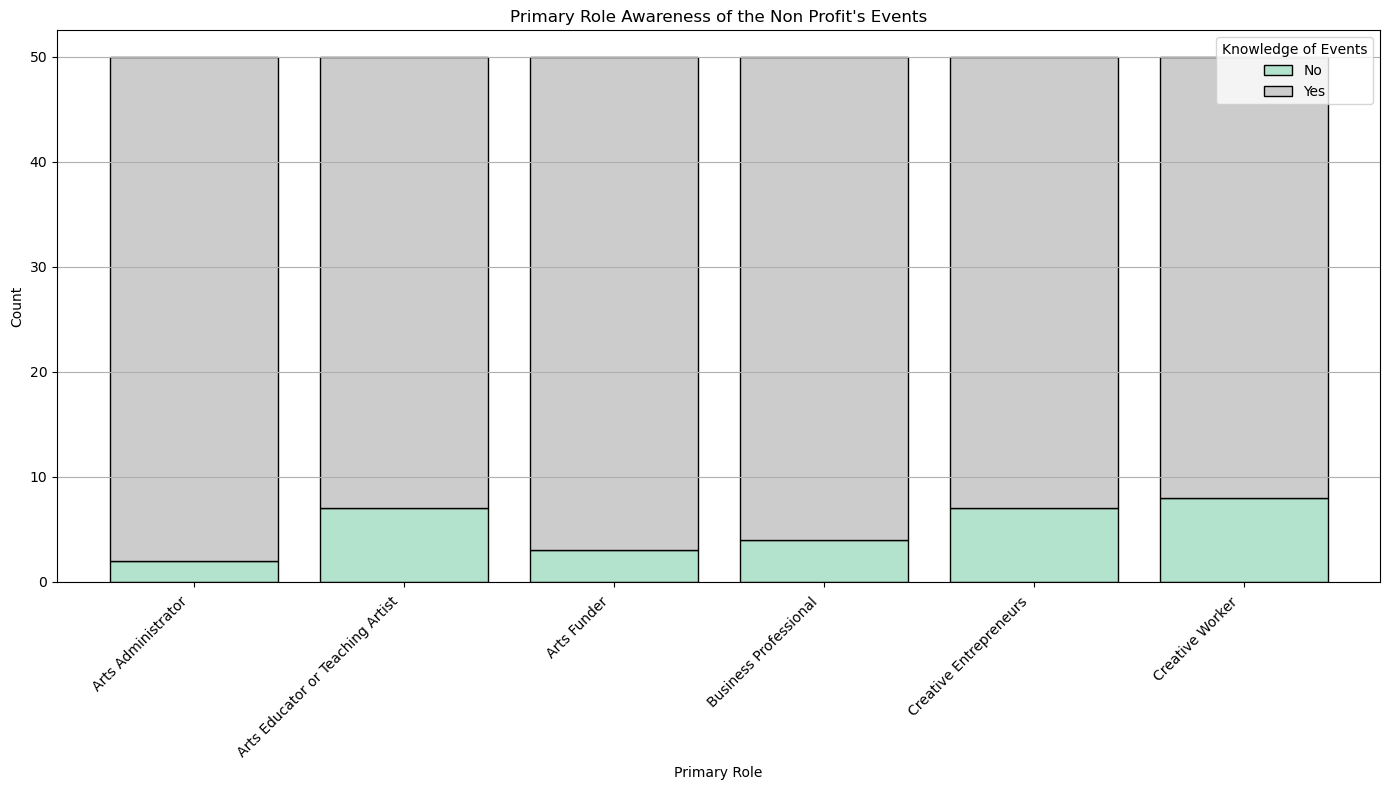

New_Column,No,Yes
Primary Role,,
Arts Administrator,2,48
Arts Educator or Teaching Artist,7,43
Arts Funder,3,47
Business Professional,4,46
Creative Entrepreneurs,7,43
Creative Worker,8,42


In [28]:
grouped_counts = df_cleaned_empty[df_cleaned_empty['New_Column'].isin(['Yes', 'No'])].groupby(['Primary Role', 'New_Column']).size().unstack().fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
grouped_counts.plot(kind='bar', stacked=True, width=0.8, figsize=(14, 8), edgecolor='black',  colormap='Pastel2')
plt.title("Primary Role Awareness of the Non Profit's Events")
plt.xlabel('Primary Role')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(title='Knowledge of Events', loc='upper right')

plt.tight_layout()
plt.show()

grouped_counts

Caption:
The stacked bar chart illustrates the awareness of the Non-Profit's events across different primary roles. Each bar represents a primary role, with the segments indicating the number of individuals aware (Yes) or unaware (No) of the events. The grey represents those who are aware, while the green denotes those who are unaware. This visualization provides insight into which roles are most engaged with the Non-Profit's events.

<Figure size 1400x800 with 0 Axes>

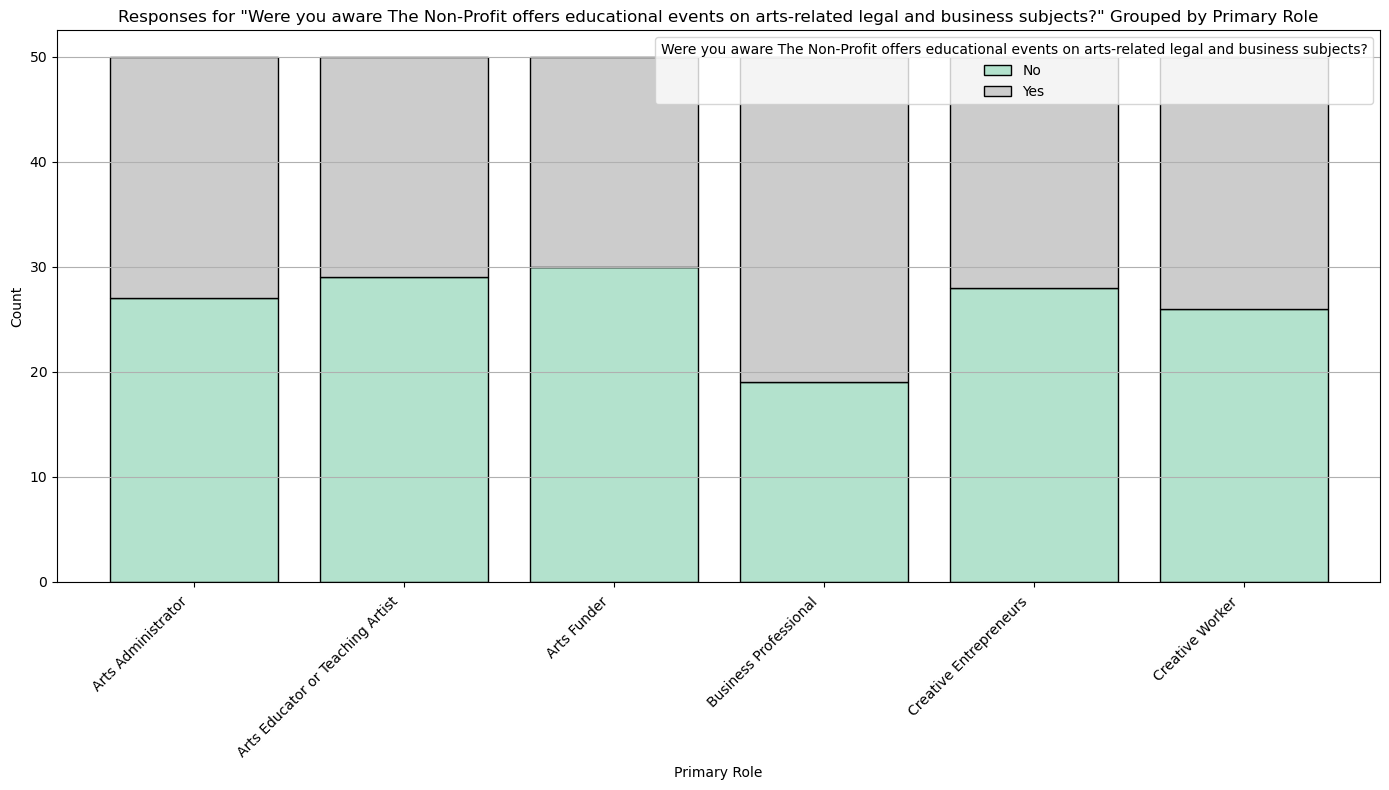

<Figure size 1400x800 with 0 Axes>

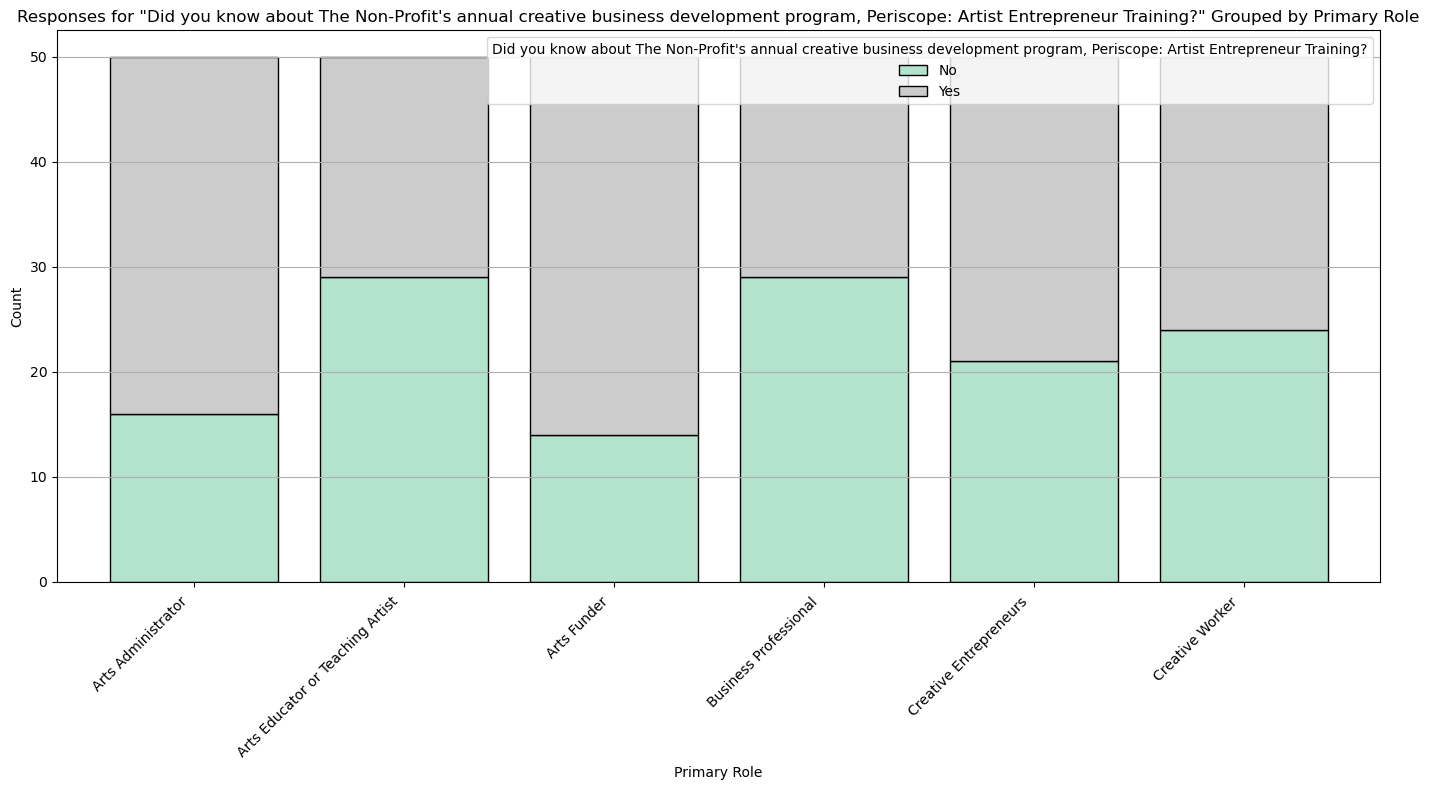

<Figure size 1400x800 with 0 Axes>

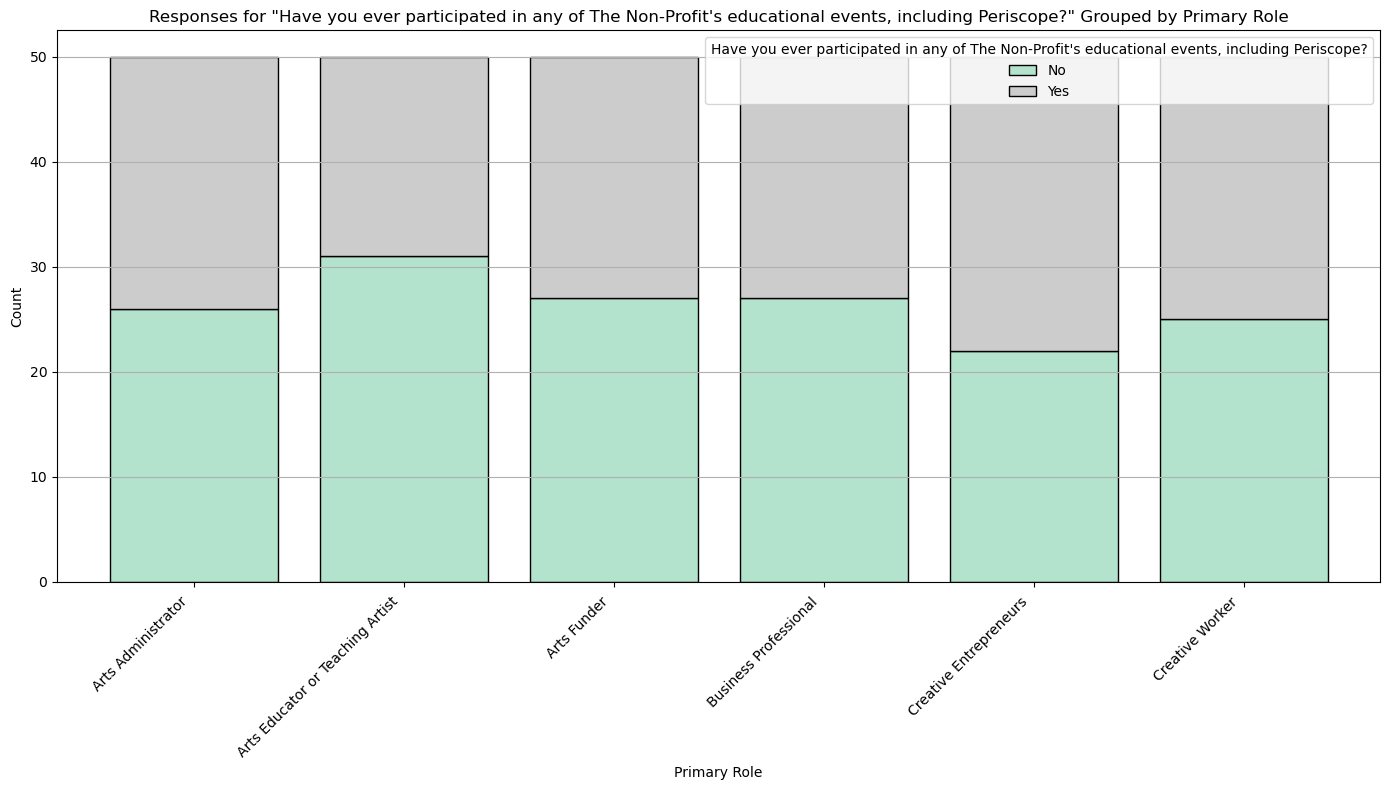

In [29]:
# Function to plot stacked bar chart for a given column
def plot_stacked_bar_for_column(column_name):
    grouped_data = df_cleaned_empty.groupby(['Primary Role', column_name]).size().unstack().fillna(0)
    
    plt.figure(figsize=(14, 8))
    grouped_data.plot(kind='bar', stacked=True, width=0.8, figsize=(14, 8), edgecolor='black', colormap='Pastel2')
    plt.title(f'Responses for "{column_name}" Grouped by Primary Role')
    plt.xlabel('Primary Role')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.legend(title=column_name, loc='upper right')
    plt.tight_layout()
    plt.show()

# Plotting stacked bar charts for the specified columns
for column in columns_to_check:
    plot_stacked_bar_for_column(column)


Caption:
The stacked bar charts illustrates the awareness of the Non-Profit's events across different primary roles. Each chart illustrates respondents' awareness of different events. Each bar represents a primary role, with the segments indicating the number of individuals aware (Yes) or unaware (No) of the events. The grey represents those who are aware, while the green denotes those who are unaware. This visualization provides insight into which roles are most engaged with the Non-Profit's events.

### Question 5: Show the distribution of words which come to mind for respondents when they think of the non-profit organization. You can do this using a package to assist in creating word clouds or also you can create a general bar plot.

##### When respondents were asked to think of the Arts & Business Council of Greater Nashville, the most frequently used words were "Influential," "Professional," "Pioneering," "Consistent," and "Empowering." Some of the words provided are synonyms of one another or use suffixes, such as "-ing" as in "empower" and "empowering." To preserve the respondents' intended meaning, we have kept all words as they were provided.

In [30]:
bar_words = df_cleaned_empty[['Primary Role',"What three words come to mind when you think of the Arts & Business Council of Greater Nashville?"]].dropna()
print(bar_words)

# Split the strings into lists of words
bar_words['words_list'] = bar_words["What three words come to mind when you think of the Arts & Business Council of Greater Nashville?"].str.split(', ')

# Explode the lists into separate rows
bar_words_exploded = bar_words.explode('words_list')

# Drop the original "What three words come to mind..." column
bar_words_exploded = bar_words_exploded.drop(columns=["What three words come to mind when you think of the Arts & Business Council of Greater Nashville?"])

# Rename the 'words_list' column for clarity
bar_words_exploded = bar_words_exploded.rename(columns={'words_list': 'Word'})

bar_words_exploded.groupby(["Primary Role",'Word']).agg({'Word':'count'})

# Count the frequency of each word
word_counts = bar_words_exploded['Word'].value_counts()

# Get the top 10 words
top_10_words = word_counts.head(10).index.tolist()

word_frequency = Counter(bar_words_exploded['Word'])


                          Primary Role  \
0                     Creative Worker    
2                         Arts Funder    
6              Creative Entrepreneurs    
7               Business Professional    
10             Creative Entrepreneurs    
..                                 ...   
344             Business Professional    
345                Arts Administrator    
346                   Creative Worker    
348  Arts Educator or Teaching Artist    
349             Business Professional    

    What three words come to mind when you think of the Arts & Business Council of Greater Nashville?  
0                             Thrive, Engage, Motivate                                                 
2                       Resourceful, Advocate, Partner                                                 
6                   Thoughtful, Reflective, Meaningful                                                 
7               Ambitious, Community-driven, Reputable                         

In [31]:
word_frequency

Counter({'Thrive': 1,
         'Engage': 2,
         'Motivate': 1,
         'Resourceful': 6,
         'Advocate': 1,
         'Partner': 1,
         'Thoughtful': 2,
         'Reflective': 2,
         'Meaningful': 2,
         'Ambitious': 1,
         'Community-driven': 3,
         'Reputable': 1,
         'Awe-inspiring': 2,
         'Memorable': 2,
         'Lasting': 2,
         'Consistent': 7,
         'Determined': 1,
         'Loyal': 1,
         'Empowerment': 2,
         'Resilience': 1,
         'Innovation': 2,
         'Committed': 3,
         'Diverse': 5,
         'Stimulating': 2,
         'Energetic': 5,
         'Driven': 3,
         'Passionate': 2,
         'Active': 1,
         'Invaluable': 1,
         'Prolific': 3,
         'Nurturing': 6,
         'Engaging': 6,
         'Interactive': 2,
         'Insightful': 2,
         'Guidance': 4,
         'Aid': 1,
         'Network': 2,
         'Catalyst': 5,
         'Synergetic': 2,
         'Pioneering': 7,
     

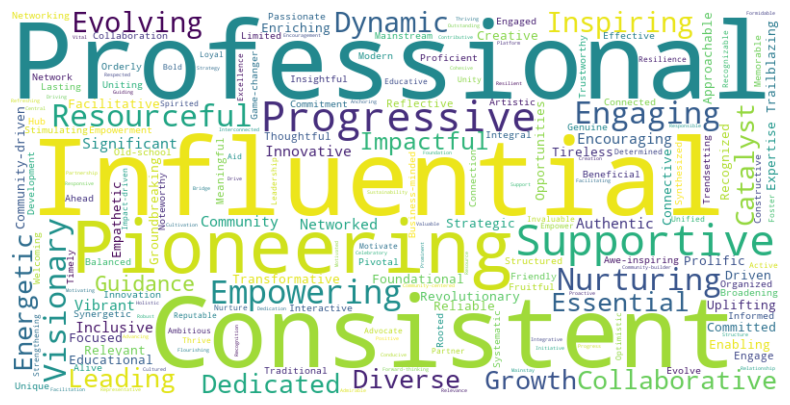

In [32]:
# Generate word cloud from frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()